1. Can we use Bagging for regression problems?


Yes, **Bagging (Bootstrap Aggregating)** can definitely be used for **regression problems**, not just classification.

### How it works in regression:
- Multiple regression models (usually of the same type, like decision trees) are trained on **different bootstrap samples** of the dataset.
- For a new input, each model makes a **numeric prediction**.
- The final prediction is the **average** of all these predictions.

### Why use Bagging in regression?
- It helps **reduce variance** without increasing bias significantly.
- It's especially useful with **high-variance models** like decision trees.
- It can lead to more stable and accurate predictions.

### A common example:
- **Random Forest Regressor** is a popular ensemble model that uses Bagging with decision trees for regression tasks.

Let me know if you want a quick example in Python!

2. What is the difference between multiple model training and single model training?



Great question! Here's a simple breakdown of the difference between **single model training** and **multiple model training**:

---

### 🔹 Single Model Training:
- You **train one model** on your dataset.
- It learns patterns and makes predictions **on its own**.
- Examples: A single decision tree, linear regression, or neural network.

**Pros:**
- Simpler to implement and understand.
- Faster to train and predict.
- Easier to interpret (especially with models like linear regression or decision trees).

**Cons:**
- Might **overfit** or **underfit** depending on the model.
- May not capture complex relationships or uncertainties well.

---

### 🔹 Multiple Model Training (Ensemble Learning):
- You train **several models** and combine their predictions.
- Used in techniques like:
  - **Bagging** (e.g., Random Forest)
  - **Boosting** (e.g., XGBoost, AdaBoost)
  - **Stacking**
  
**Pros:**
- Usually **more accurate** and **robust** than a single model.
- Helps reduce **variance**, **bias**, or both depending on the method.
- More stable with noisy data.

**Cons:**
- More **computationally expensive**.
- Harder to interpret.
- Requires more **time and resources** for training and tuning.

---

### 🔁 Summary:

| Feature                 | Single Model          | Multiple Models (Ensemble)    |
|------------------------|-----------------------|-------------------------------|
| Simplicity             | ✔️ Simple              | ❌ More complex                |
| Performance            | ❌ Less robust         | ✔️ More accurate & robust      |
| Interpretability       | ✔️ Easier              | ❌ Harder                      |
| Training Time          | ✔️ Faster              | ❌ Slower                      |

---

Want an example where multiple model training clearly beats a single model?

3. Explain the concept of feature randomness in Random Forest.


Absolutely! Let’s break down the concept of **feature randomness** in **Random Forests**:

---

### 🌲 What is Feature Randomness?

In a **Random Forest**, feature randomness refers to the idea that:
> **Each decision tree in the forest only considers a random subset of features when splitting at each node**, not all the features.

---

### 🤔 Why introduce feature randomness?

This randomness helps to:
- **Reduce correlation** between the individual trees.
- Encourage **diversity** in the trees’ structure.
- Improve **generalization** and **reduce overfitting**.

Without feature randomness, many trees might end up looking similar, especially if some features are much more informative than others.

---

### ⚙️ How it works:

- Suppose you have a dataset with **100 features**.
- When a tree is building and needs to decide on a split at a node, instead of considering **all 100 features**, it might consider only a **random subset** (e.g., √100 = 10 features).
- It picks the **best split** only among those 10 features.
- This happens **at each split** of the tree, not just once.

---

### 📊 Example:

| Tree | Features considered at each split |
|------|-----------------------------------|
| Tree 1 | Random 10 out of 100             |
| Tree 2 | Another random 10 out of 100     |
| Tree 3 | Yet another random 10            |

Because of this randomness:
- Trees are **decorrelated**.
- The forest as a whole becomes **more powerful** through averaging.

---

### ✅ Benefit Recap:
- Reduces overfitting
- Improves accuracy
- Increases robustness

Let me know if you want a visual or a small code example to see it in action!

4. What is OOB (Out-of-Bag) Score?


Great question! Let's break down the **OOB (Out-of-Bag) Score** in a way that's easy to grasp:

---

### 🧺 What is "Out-of-Bag" in Random Forest?

In **Random Forest**, each tree is trained using a **bootstrap sample** — this means:
- It randomly samples the training data **with replacement**.
- So, some data points will be repeated, and **some won’t be selected at all**.

The ones that **aren’t selected** for training a particular tree are called:
> **Out-of-Bag (OOB) samples** for that tree.

---

### 📊 What is the OOB Score?

The **OOB Score** is an internal validation method in Random Forests:
> It's the **average accuracy (or error)** of each data point when predicted **only by the trees that did NOT train on it**.

Think of it like a **built-in cross-validation**:
- No need for a separate validation set.
- Each data point is tested on multiple trees that never saw it during training.

---

### ✅ Why is OOB Score Useful?

- **Saves time** — no need to create a separate test set or use cross-validation.
- Gives an **unbiased estimate** of the model’s performance on unseen data.
- Helps during model training for quick feedback.

---

### 🧠 Summary:

| Feature           | Description                                     |
|------------------|-------------------------------------------------|
| OOB Samples       | Data not used in training a specific tree       |
| OOB Prediction    | Prediction made using only OOB trees            |
| OOB Score         | Accuracy (or R² score) using only OOB predictions |

---

### 📌 In Python (sklearn):

```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)
model.fit(X_train, y_train)

print("OOB Score:", model.oob_score_)
```

Let me know if you’d like an example with regression too!

5. How can you measure the importance of features in a Random Forest model?


Awesome question! In a **Random Forest model**, you can measure **feature importance** to understand **which features are most influential** in making predictions.

There are two common ways to measure feature importance:

---

### 🔹 1. **Mean Decrease in Impurity (MDI)** (a.k.a. Gini Importance)
This is the **default method** in most implementations like scikit-learn.

**How it works:**
- Every time a feature is used to split a node, the **impurity** (like Gini or MSE) goes down.
- The total decrease in impurity is **accumulated** for each feature over all trees.
- Features that cause **bigger drops in impurity** are considered more important.

**Pros:**
- Fast and built-in.
- Easy to interpret.

**Cons:**
- Can be biased toward numerical or high-cardinality features.

---

### 🔹 2. **Permutation Importance**
This is a **model-agnostic** and **more reliable** method.

**How it works:**
- First, calculate the model's **baseline accuracy** (or R²).
- Then, **shuffle one feature's values**, and measure the drop in performance.
- A bigger drop = the feature was more important.
- Repeat for all features.

**Pros:**
- Works with any model, not just Random Forest.
- Less biased.

**Cons:**
- Slower (you have to re-evaluate the model multiple times).

---

### 📊 In Python (scikit-learn):

#### 🔸 MDI Feature Importances:
```python
importances = model.feature_importances_
```

#### 🔸 Permutation Importances:
```python
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)
importances = result.importances_mean
```

---

### 🧠 Summary:

| Method               | Description                          | Pros                  | Cons              |
|----------------------|--------------------------------------|------------------------|-------------------|
| Mean Decrease in Impurity | Based on splits in trees              | Fast, easy             | Can be biased      |
| Permutation Importance     | Based on performance drop after shuffling | More reliable          | Slower to compute  |

Let me know if you want a plot of feature importances or a full working code snippet!

6. Explain the working principle of a Bagging Classifier.


Sure! Here's a clear and simple explanation of how a **Bagging Classifier** works:

---

### 🧠 What is a Bagging Classifier?

**Bagging (Bootstrap Aggregating)** is an ensemble learning method that combines **multiple base classifiers** to improve stability and accuracy.

> A **Bagging Classifier** is a model that uses **bagging** with a **classification algorithm** (like decision trees) to make better predictions.

---

### ⚙️ Working Principle – Step by Step:

1. **Bootstrap Sampling**:
   - From your original dataset, generate **multiple random samples** (with replacement).
   - Each sample may contain repeated records and will be used to train a separate model.

2. **Train Multiple Models**:
   - Train **the same type of model** (e.g., Decision Tree Classifier) on each bootstrap sample.
   - Each model will learn slightly different things due to different training data.

3. **Voting for Final Prediction**:
   - When making predictions:
     - Each model gives its prediction (class label).
     - The **final output** is decided by **majority vote** (the class predicted by most models).

---

### 🧩 Example: Binary Classification

- You build 10 decision tree classifiers using different bootstrapped subsets.
- For a new data point:
  - 6 models predict class **A**, 4 models predict class **B**.
  - The Bagging Classifier outputs class **A** (majority wins).

---

### ✅ Why Use a Bagging Classifier?

- **Reduces variance**: Especially useful for high-variance models like decision trees.
- **Improves generalization**: Less likely to overfit.
- **Robust to noise**: Since multiple models vote, it smooths out outliers and random noise.

---

### 🛠 In Python (with scikit-learn):

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)
```

---

### 📌 Summary:

| Step                   | Description                             |
|------------------------|-----------------------------------------|
| Sampling               | Random bootstrapped subsets             |
| Model Training         | Train a base classifier on each subset |
| Prediction             | Majority voting among all classifiers  |

---

Let me know if you want to compare it to Boosting next!

7. How do you evaluate a Bagging Classifier's performance?


Great question! Evaluating a **Bagging Classifier's performance** is very similar to evaluating any classification model — but with a few **extra perks** specific to bagging (like OOB score). Here's how you do it:

---

### 🔹 1. **Train-Test Split or Cross-Validation**
Use a separate **test set** or **cross-validation** to check how well your model generalizes.

**Common metrics:**
- **Accuracy** – Overall correctness
- **Precision, Recall, F1 Score** – Especially useful for imbalanced data
- **Confusion Matrix** – Gives a full breakdown of predictions
- **ROC-AUC** – Measures performance across all classification thresholds

---

### 🔹 2. **OOB (Out-of-Bag) Score** (Bonus from Bagging!)
Bagging models like `BaggingClassifier` support **OOB evaluation**, which gives you an **unbiased performance estimate** without needing a separate validation set.

**How to use it:**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    oob_score=True,
    random_state=42
)

model.fit(X_train, y_train)
print("OOB Score:", model.oob_score_)
```

---

### 🔹 3. **Evaluate on Test Data**
Once trained, evaluate the model like so:

```python
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

---

### 📈 Optional Extras:
- **Plot learning curves**
- **Check feature importances** if base estimator supports it
- **Compare performance with and without bagging**

---

### 🧠 Summary:

| Evaluation Method      | Purpose                                |
|------------------------|----------------------------------------|
| Accuracy / F1 Score    | Measure overall performance            |
| Confusion Matrix       | See detailed prediction breakdown      |
| ROC-AUC Curve          | Evaluate classifier threshold behavior |
| OOB Score              | Built-in, no need for validation set   |

---

Let me know if you want help plotting performance or tuning the BaggingClassifier for best results!

8. How does a Bagging Regressor work?


Great follow-up! A **Bagging Regressor** works very similarly to a Bagging Classifier, but it's used for **regression tasks** — meaning it predicts **continuous numeric values** rather than class labels.

Let’s break it down step by step:

---

### 🔧 **How a Bagging Regressor Works**

1. **Bootstrap Sampling**:
   - Generate multiple **random subsets** of your training data using **sampling with replacement**.
   - Each subset will train a different **base regressor** (often a Decision Tree Regressor).

2. **Train Multiple Regressors**:
   - A base regressor is trained on each bootstrapped sample.
   - Because the data varies, each model learns **slightly different patterns**.

3. **Aggregate Predictions by Averaging**:
   - For a new data point, each model makes a prediction (e.g., house price).
   - The final output is the **average** of all those predictions.

   > Prediction = (pred₁ + pred₂ + ... + predₙ) / n

---

### 🧠 Example:

You train 5 decision tree regressors, and they predict the following for a new sample:

- Tree 1: $220,000  
- Tree 2: $210,000  
- Tree 3: $225,000  
- Tree 4: $230,000  
- Tree 5: $215,000

**Final Bagging Regressor Output** =  
(220,000 + 210,000 + 225,000 + 230,000 + 215,000) / 5 = **$220,000**

---

### ✅ Why Use a Bagging Regressor?

- **Reduces variance** in high-variance models (like decision trees).
- Improves **stability and accuracy**.
- Helps avoid **overfitting**.
- More **robust** to noise in the training data.

---

### 📘 In Python (scikit-learn):

```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

---

### 🧪 Evaluate with regression metrics:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**

```python
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
```

---

### 🧾 Summary:

| Step              | Description                             |
|-------------------|------------------------------------------|
| Bootstrap Samples | Random subsets (with replacement)        |
| Train Models      | Same regressor (e.g., Decision Tree)     |
| Combine Output    | **Average predictions** for final result |

Let me know if you want a comparison between Bagging and Boosting for regression!

9. What is the main advantage of ensemble techniques?


Great wrap-up question! The **main advantage of ensemble techniques** is:

> 🧠 **They combine multiple models to create a stronger, more accurate, and more robust overall model than any single one could achieve on its own.**

Let’s break that down a bit more:

---

### 🔑 **Key Advantages of Ensemble Techniques**

1. ### ✅ **Higher Accuracy**
   - By combining predictions from multiple models, ensembles **correct individual model mistakes**.
   - Reduces the risk of picking a “bad” model.

2. ### 🔁 **Reduced Overfitting**
   - Techniques like **Bagging** (e.g., Random Forest) help reduce overfitting by averaging models trained on different samples.
   - Boosting methods (like Gradient Boosting) **focus on hard-to-predict examples** without overfitting quickly.

3. ### 📉 **Reduced Variance and/or Bias**
   - Bagging: Reduces **variance** (good for high-variance models like decision trees).
   - Boosting: Reduces **bias** (good for underfitting models).

4. ### 💪 **More Robust and Stable Predictions**
   - Ensembles are **less sensitive to noise** or outliers in the data.
   - They smooth out anomalies across multiple models.

5. ### 📊 **Better Generalization**
   - Ensembles usually perform better on **unseen data** because they combine different perspectives on the data.

---

### 🔁 Analogy:
Think of it like a **committee of experts**:
- One expert might be wrong.
- But a group decision (averaging or voting) tends to be **more reliable** and **less extreme**.

---

### 🧾 Summary Table:

| Advantage              | Benefit                                |
|------------------------|----------------------------------------|
| Improved Accuracy      | Combines strengths of multiple models  |
| Reduced Overfitting    | More stable predictions                |
| Lower Variance/Bias    | Depending on method (bagging/boosting) |
| Better Generalization  | Performs well on new data              |

---

If you're curious, I can also break down which ensemble technique to use in which scenario — just let me know!

10. What is the main challenge of ensemble methods?


Great question! While **ensemble methods** offer powerful advantages, they do come with some **challenges**. The **main challenge** is:

> ⚠️ **Increased complexity and reduced interpretability.**

Let’s dig into this and a few other key challenges:

---

### 🔹 1. **Reduced Interpretability**
- Unlike simple models (e.g., linear regression or a single decision tree), ensembles are **harder to understand and explain**.
- For example, it’s tough to say exactly *why* a Random Forest or Gradient Boosting model made a particular decision.

---

### 🔹 2. **Higher Computational Cost**
- Training **multiple models** (especially if using complex base learners or lots of estimators) takes more **time and memory**.
- This can be an issue for large datasets or real-time applications.

---

### 🔹 3. **Difficult to Tune**
- Ensemble methods often come with **many hyperparameters**.
- Choosing the right number of models, depth of trees, learning rate, etc., can require extensive tuning and cross-validation.

---

### 🔹 4. **Risk of Overfitting (in some cases)**
- While methods like Bagging reduce overfitting, **Boosting techniques** (like XGBoost or AdaBoost) can overfit if not properly tuned.

---

### 🔹 5. **Harder Deployment**
- Larger and more complex models are **more difficult to deploy** in low-latency or resource-constrained environments.

---

### 🧾 Summary Table:

| Challenge               | Description                                             |
|-------------------------|---------------------------------------------------------|
| ❗ Interpretability      | Hard to explain predictions                             |
| 🖥️ Computational Cost     | Requires more time and resources                       |
| ⚙️ Hyperparameter Tuning  | Often needs careful tuning for best performance        |
| ⚠️ Overfitting Risk        | Especially in Boosting if not tuned well               |
| 📦 Deployment Complexity | Harder to integrate into production pipelines           |

---

### ✅ Pro Tip:
If interpretability is critical (e.g., in healthcare or finance), you might want to:
- Use simpler models.
- Or combine ensembles with **explainability tools** like SHAP or LIME.

Want help comparing different ensemble methods based on use cases?

11. Explain the key idea behind ensemble techniques.


The key idea behind **ensemble techniques** is to **combine multiple models** (often called **learners** or **base models**) to create a stronger, more accurate, and more robust model.

In simpler terms:
> **Ensemble learning takes a group of weaker models and combines them to make a stronger model that performs better than any individual model could on its own.**

---

### 🔑 **Key Concepts Behind Ensemble Techniques**:

1. **Diversity of Models**:
   - The ensemble works best when the models are **diverse**, meaning they make different types of errors.
   - By combining diverse models, the ensemble can **average out** or **correct mistakes**, leading to better overall performance.

2. **Combining Predictions**:
   - For **classification tasks**, the ensemble typically combines predictions through:
     - **Majority voting** (for Bagging).
     - **Weighted voting or boosting** (for Boosting).
   - For **regression tasks**, the ensemble averages the predictions from multiple models.

3. **Reduction of Overfitting**:
   - Some ensemble methods, like **Bagging**, reduce **variance** (overfitting to the training data), while others, like **Boosting**, reduce **bias** (underfitting).
   - The goal is to **generalize better** to unseen data by leveraging multiple models instead of relying on a single model that might overfit or underfit.

---

### 🔍 **Why It Works**:

- **Independence of errors**: By combining multiple models, the chances that all models make the same mistake on a given input is **lower**, which improves the ensemble's accuracy.
  
- **Boosting and Bagging**:
  - **Bagging (Bootstrap Aggregating)**: Builds multiple models independently on random subsets of data and averages their predictions. It helps reduce **variance**.
  - **Boosting**: Trains models sequentially, with each new model focusing on correcting the mistakes of the previous one. It helps reduce **bias**.

---

### 🎯 **Key Benefits of Ensemble Techniques**:
- **Improved performance**: Often, ensembles outperform single models by a significant margin.
- **More robust**: Less likely to be influenced by noise or overfitting.
- **Versatility**: Ensemble methods can be used for both **classification** and **regression** tasks.

---

### 🧾 Summary:
The core idea is to take multiple weak models, each making different mistakes, and combine them to make a stronger overall model that performs better on **generalization** (unseen data).

---

Would you like to explore specific types of ensemble methods like **Bagging** and **Boosting**?

12. What is a Random Forest Classifier?


A **Random Forest Classifier** is an ensemble learning algorithm primarily used for **classification tasks**. It builds a **forest** of **decision trees** and makes predictions by combining the results of these individual trees.

Here's how it works, broken down step by step:

---

### 🌲 **What is Random Forest?**

**Random Forest** is an ensemble method that combines **multiple decision trees** to improve performance and robustness.

- Each tree is trained on a **random subset** of the data (using **bootstrap sampling**).
- At each split in a tree, **a random subset of features** is considered, which makes each tree **less correlated** with the others.

The final **classification** prediction is made by **majority voting** from all the trees in the forest. The more trees in the forest, the better the model's performance tends to be, although after a certain point, the performance plateaus.

---

### ⚙️ **How Does a Random Forest Classifier Work?**

1. **Bootstrap Sampling**:
   - From your training data, create multiple **random subsets** by sampling **with replacement**. Each subset will be used to train a separate decision tree.
   
2. **Training Multiple Decision Trees**:
   - Each decision tree is trained on a different bootstrap sample, and at each split, only a **random subset of features** is considered for making a decision.
   
3. **Majority Voting**:
   - When making predictions, each tree in the forest **votes** for a class.
   - The **final prediction** is based on the class that received the majority of votes from all trees in the forest.

---

### ✅ **Why Use Random Forest Classifier?**

- **Reduces Overfitting**: By using multiple trees and averaging their results, random forests reduce the risk of overfitting that individual decision trees may experience.
- **Improved Accuracy**: Combining predictions from many trees often leads to better generalization and higher accuracy.
- **Handles Missing Data Well**: Random forests can handle missing data and still make reliable predictions.
- **Handles High-Dimensional Data**: Random forests can work well with data that has many features and handle categorical and continuous variables efficiently.
- **Robust to Noise**: Since multiple trees vote, the model is less sensitive to noisy data points.

---

### 🧑‍💻 **In Python (scikit-learn)**:

Here's how to train a Random Forest Classifier using scikit-learn:

```python
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
```

---

### 🔑 **Key Hyperparameters**:

- **n_estimators**: The number of trees in the forest.
- **max_depth**: The maximum depth of each tree (limits the complexity).
- **min_samples_split**: The minimum number of samples required to split an internal node.
- **max_features**: The number of features to consider when looking for the best split.
- **random_state**: For reproducibility.

---

### 🧾 **Summary**:

A **Random Forest Classifier** combines many decision trees to improve classification accuracy and robustness. It reduces overfitting, handles high-dimensional data well, and provides reliable predictions by averaging the results of individual decision trees.

---

Let me know if you'd like to dive deeper into how the decision trees in Random Forest work or explore its advantages over other classifiers!

13. What are the main types of ensemble techniques?

Ensemble techniques combine multiple models to improve performance, and there are **three main types** of ensemble methods:

### 1. **Bagging (Bootstrap Aggregating)**
   - **Key Idea**: Build multiple models (usually the same type of model) independently using **bootstrapped subsets** of the data, and combine their predictions to reduce variance and prevent overfitting.
   - **How it works**: Each model is trained on a **random subset of the training data** (with replacement). For prediction, each model "votes" and the majority vote (classification) or average (regression) is used as the final prediction.
   - **Main Goal**: Reduce **variance** (especially in high-variance models like decision trees).
   - **Examples**:
     - **Random Forest**: A type of Bagging with decision trees as the base model.
     - **Bagging Regressor**: Similar to Random Forest, but for regression tasks.

---

### 2. **Boosting**
   - **Key Idea**: Train multiple models **sequentially**, where each new model tries to correct the mistakes of the previous ones. The predictions are combined, often with weighted voting or averaging.
   - **How it works**: In each iteration, a model is trained on the **entire training set**, but the weights of the misclassified instances are increased so the next model focuses on these harder cases. Boosting aims to **reduce bias** by sequentially improving predictions.
   - **Main Goal**: Reduce **bias** and improve predictive performance.
   - **Examples**:
     - **AdaBoost**: Adapts the weights of misclassified instances and focuses more on hard-to-classify data points.
     - **Gradient Boosting** (e.g., **XGBoost**, **LightGBM**, **CatBoost**): Builds trees sequentially, where each new tree fits the residuals (errors) of the previous tree.

---

### 3. **Stacking (Stacked Generalization)**
   - **Key Idea**: Combine predictions from multiple models (called **base learners**) by training a **meta-model** on the outputs of the base models to make a final prediction.
   - **How it works**:
     1. Train several base models (can be different types of models, such as decision trees, logistic regression, etc.).
     2. Use the predictions of these base models as inputs to a **meta-model** (often a simple model like logistic regression or another classifier).
     3. The meta-model learns how to best combine these predictions to improve the overall performance.
   - **Main Goal**: Leverage the strengths of different types of models by using a meta-model to combine them in an optimal way.
   - **Examples**:
     - **Stacked Generalization**: Combining base models like Random Forest, SVM, and Logistic Regression, then training a meta-model to combine their outputs.

---

### 🧩 **Summary of Main Ensemble Methods**:

| **Ensemble Technique** | **Key Idea**                                                                                   | **Main Goal**    | **Examples**                                                   |
|------------------------|-----------------------------------------------------------------------------------------------|------------------|---------------------------------------------------------------|
| **Bagging**             | Build models independently on bootstrapped data, combine predictions                          | Reduce variance  | **Random Forest**, **Bagging Regressor**                      |
| **Boosting**            | Train models sequentially, each correcting the errors of the previous model                   | Reduce bias      | **AdaBoost**, **Gradient Boosting** (XGBoost, LightGBM, CatBoost) |
| **Stacking**            | Train base models, then use their predictions to train a meta-model                           | Improve accuracy | **Stacked Generalization**                                    |

---

### 🧠 **Quick Recap:**
- **Bagging**: Builds many **independent** models and combines their results to reduce variance.
- **Boosting**: Builds models **sequentially**, focusing on correcting errors, to reduce bias.
- **Stacking**: Uses a meta-model to combine predictions from multiple different models.

---

Would you like to dive deeper into one of these methods, or see code examples?

14. What is ensemble learning in machine learning?

**Ensemble learning** in machine learning is a technique that combines the predictions of multiple models (often called **learners** or **base models**) to produce a **stronger, more accurate model** than any single model could achieve on its own. The idea is to leverage the **wisdom of the crowd**—multiple models working together can reduce errors, improve performance, and make more reliable predictions.

### 🌟 **Key Idea of Ensemble Learning**:
- Instead of relying on a **single model**, ensemble learning combines several models to **enhance overall performance**, whether by reducing errors, increasing accuracy, or providing robustness against noise in the data.

---

### 🔑 **Why Use Ensemble Learning?**

1. **Better Accuracy**: By combining predictions, ensembles can outperform individual models. This is especially helpful when individual models are prone to high variance (like decision trees) or high bias (like linear models).
  
2. **Reduces Overfitting**: Many ensemble methods, such as **Bagging**, reduce the likelihood of overfitting by averaging out the mistakes of individual models.

3. **Robustness to Noise**: Ensembles tend to be more **robust** to outliers and noisy data, as different models may "smooth out" extreme values in the dataset.

4. **Improved Generalization**: Ensemble methods often generalize better to unseen data, because they combine the strengths of different base models.

---

### ⚙️ **How Does Ensemble Learning Work?**

Ensemble methods combine predictions using one of the following strategies:

1. **Voting** (for Classification):
   - Each model in the ensemble makes a prediction (often called a "vote").
   - The **final prediction** is made by **majority voting** (for classification) or **averaging** (for regression).
   
2. **Weighted Voting** (for Classification):
   - Instead of all models having equal weight, **more accurate models may have more influence** on the final prediction.
   
3. **Boosting and Bagging**:
   - **Bagging**: Build multiple models **independently**, often with random subsets of data (e.g., Random Forest).
   - **Boosting**: Build models **sequentially**, where each new model attempts to correct the mistakes of the previous one (e.g., AdaBoost, XGBoost).

---

### 📚 **Common Ensemble Methods**:

1. **Bagging (Bootstrap Aggregating)**:
   - Involves creating multiple models independently using random subsets of the training data.
   - **Random Forest** is a popular example of bagging.
   
2. **Boosting**:
   - Builds models sequentially where each model is trained to correct the errors made by the previous one.
   - **AdaBoost**, **Gradient Boosting**, and **XGBoost** are popular boosting algorithms.

3. **Stacking (Stacked Generalization)**:
   - Combines predictions from multiple models (which can be different types of models) and uses a **meta-model** to make the final prediction.

---

### 🌱 **Benefits of Ensemble Learning**:

- **Increased Model Robustness**: The final model is less likely to be biased by any individual base model.
- **Better Performance on Complex Datasets**: Combining diverse models can handle complex relationships better than a single model.
- **Flexibility**: You can combine models that are quite different, like decision trees, logistic regression, and neural networks.

---

### 🧑‍💻 **In Python (scikit-learn)**:

Here’s an example of how you can implement a **Random Forest** classifier (a Bagging technique) in scikit-learn:

```python
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
```

---

### 🧾 **Summary**:
Ensemble learning is the process of combining multiple models to create a **stronger, more accurate model**. The three main types are **Bagging**, **Boosting**, and **Stacking**. The goal is to improve model performance by reducing bias, variance, or both.

---

Let me know if you’d like to dive deeper into any specific ensemble method or want examples of how they can be used!

15. When should we avoid using ensemble methods?


While ensemble methods can significantly improve performance in many cases, there are situations where they may not be the best choice. Here are some key scenarios when you **should avoid using ensemble methods**:

---

### 🚫 **1. When Model Interpretability is Crucial**
- **Ensemble methods**, especially complex ones like **Random Forests** and **Gradient Boosting**, tend to be **less interpretable** than simple models like linear regression or decision trees.
- If your model needs to be easily **explained** (e.g., in regulated industries like healthcare or finance, where decisions need to be transparent), an ensemble model might be more difficult to explain.
- **Alternative**: In such cases, simpler models like **logistic regression** or **decision trees** might be preferable.

---

### 🚫 **2. When You Have Limited Data**
- Ensemble methods like **Random Forests** or **Boosting** often require a substantial amount of data to be effective.
- If you have a **small dataset**, ensembles might lead to **overfitting** because multiple models can pick up noise from the limited data.
- **Alternative**: If the dataset is small, you might be better off using simpler models like **logistic regression**, **K-Nearest Neighbors**, or even a single **decision tree**.

---

### 🚫 **3. When Computational Resources Are Limited**
- Ensemble models, especially those with a large number of base models (e.g., a forest with thousands of trees or many boosting iterations), can be **computationally expensive**.
- They require more memory and processing time during both training and prediction, which might not be feasible in **resource-constrained environments**.
- **Alternative**: In such cases, you might opt for **single models** that are more efficient in terms of time and memory, such as **linear regression** or **SVMs**.

---

### 🚫 **4. When Prediction Time Needs to Be Very Fast**
- Ensemble methods, particularly those involving **many base models**, can be slower during **prediction** due to the need to make predictions from multiple models and aggregate them.
- If **real-time** predictions are required or low-latency predictions are critical, the time it takes for an ensemble method to make predictions might be an issue.
- **Alternative**: In these cases, a single **decision tree** or a **logistic regression** model would likely provide faster predictions.

---

### 🚫 **5. When You’re Dealing with a High-dimensional Dataset (Without Sufficient Data)**
- In high-dimensional spaces (with many features), some ensemble methods, like **Random Forests**, may become **inefficient** without sufficient data.
- The number of features being randomly selected at each split can increase the model complexity, and without enough data, it might not generalize well.
- **Alternative**: You might want to consider **feature selection** methods or dimensionality reduction techniques (e.g., **PCA**) before applying a simpler model.

---

### 🚫 **6. When the Model Complexity Needs to Be Low**
- Ensemble methods are inherently more **complex** than single models. If the **simplicity** of your model is a priority, such as in embedded systems, mobile apps, or when explaining the model to non-technical stakeholders, using an ensemble might introduce unnecessary complexity.
- **Alternative**: In these cases, simpler models like **logistic regression**, **SVMs**, or **Naive Bayes** can be more appropriate.

---

### 🧾 **Summary: When to Avoid Ensemble Methods**

| **Scenario**                          | **Reason to Avoid**                                                  | **Alternative**                   |
|---------------------------------------|----------------------------------------------------------------------|-----------------------------------|
| **Model Interpretability**            | Hard to explain and interpret, especially for regulatory reasons      | Logistic regression, decision trees|
| **Limited Data**                      | Prone to overfitting with small datasets                             | Single models (e.g., decision trees)|
| **Limited Computational Resources**   | Ensemble models are resource-intensive in terms of time and memory    | Simpler models (e.g., linear models)|
| **Fast Prediction Required**          | Slower prediction times due to multiple models being aggregated       | Decision trees, logistic regression|
| **High-dimensional Data**             | Inefficient in high-dimensional spaces without sufficient data       | Feature selection, simpler models |
| **Low Model Complexity Needed**       | Ensembles introduce unnecessary complexity                           | Simple models (e.g., SVM, Naive Bayes)|

---

### 🚀 **Takeaway**:
Ensemble methods are powerful, but they come with trade-offs in terms of complexity, interpretability, and computational cost. If any of these factors are a priority in your project, you may want to reconsider using ensemble methods or choose simpler alternatives.

Let me know if you'd like to dive into examples or other alternatives!

16. How does Bagging help in reducing overfitting?


**Bagging** (Bootstrap Aggregating) is a powerful ensemble method that helps in **reducing overfitting** by using multiple models (typically the same type of model) trained on random subsets of the training data. Here's how Bagging helps in reducing overfitting:

### 🔑 **How Bagging Works**:

1. **Bootstrap Sampling**:
   - Bagging creates **multiple subsets** of the original training data by **sampling with replacement** (i.e., randomly selecting data points, allowing duplicates).
   - Each model in the ensemble is trained on a **different bootstrap sample**.
   
2. **Model Training**:
   - Multiple base models (often decision trees) are trained independently on these bootstrapped samples.

3. **Prediction Aggregation**:
   - For **classification tasks**, the final prediction is made by **majority voting** (the class that most models predict).
   - For **regression tasks**, the final prediction is the **average** of all the model predictions.

---

### 📉 **How Bagging Reduces Overfitting**:

1. **Reduces Variance**:
   - **Overfitting** typically occurs when a model becomes too complex and fits the noise or peculiarities of the training data.
   - Since Bagging involves training multiple models on different subsets of the data, **each model overfits on different parts** of the training set.
   - By averaging the predictions or taking a majority vote, Bagging smooths out the errors from individual models, **reducing the overall variance**.
   - The result is a model that generalizes better to new, unseen data.

2. **Decouples Models**:
   - Each model in the ensemble is trained on a **different subset of the data**, meaning each tree or model is likely to make different errors.
   - When predictions are aggregated, the errors from individual models **cancel out**, which reduces the overall risk of overfitting to noise.

3. **Less Sensitivity to Noise**:
   - If one model overfits due to noise in the data, the other models in the ensemble are less likely to do so, especially if the noise is specific to a few data points.
   - Bagging reduces the impact of **outliers and noise**, as they will likely affect only a subset of the models, not the entire ensemble.

4. **Improves Stability**:
   - Individual models like decision trees are often unstable and prone to high variance (they can dramatically change with small variations in the data).
   - By aggregating the predictions of multiple such models, Bagging helps to create a **more stable model** that doesn't react to small fluctuations in the data, thus reducing overfitting.

---

### 🧑‍💻 **Example with Random Forest (a form of Bagging)**:

Random Forest is a well-known example of Bagging, where multiple decision trees are trained on bootstrapped subsets of the data and predictions are averaged (or voted on).

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
```

### 🎯 **Key Points**:
- **Bagging** reduces overfitting by **averaging the predictions** or **majority voting** from multiple models, making it less sensitive to the noise and variance of the data.
- By using multiple **bootstrapped samples**, it helps to create an **ensemble of less complex models** that collectively generalize better.
- **Random Forest**, which is based on Bagging, is a widely used technique to reduce overfitting in decision trees.

---

### 🧾 **Summary**:
- Bagging helps in **reducing overfitting** by training multiple models on different subsets of data and aggregating their predictions, which reduces variance and makes the model less prone to fitting noise in the data.
- It’s particularly useful when base models (like decision trees) tend to overfit the training data.

Let me know if you'd like further examples or clarifications!

17. Why is Random Forest better than a single Decision Tree?


**Random Forest** is generally considered **better than a single decision tree** due to several key advantages that it provides. Here's a detailed explanation of why **Random Forest** outperforms a single decision tree:

---

### 1. **Reduces Overfitting**
   - **Single Decision Tree**: A decision tree, especially when it is deep, is highly prone to overfitting. It learns very specific patterns in the training data, which may not generalize well to unseen data. This can lead to poor performance on the test set.
   - **Random Forest**: Random Forest mitigates overfitting by averaging the predictions of multiple decision trees. Since each tree is trained on a different subset of the data (through bootstrapping) and uses a random subset of features for each split, it’s less likely to overfit compared to a single decision tree. This **reduces variance** and leads to better generalization on unseen data.

---

### 2. **Improved Accuracy**
   - **Single Decision Tree**: A single decision tree is often not very accurate, especially when dealing with complex or noisy data. While it may capture some patterns in the data, it can also learn irrelevant or spurious relationships.
   - **Random Forest**: By combining the results of many decision trees, Random Forest aggregates the predictions, often leading to a more **accurate** and **robust** model. The **majority vote** (for classification) or **average** (for regression) from multiple trees improves overall accuracy.

---

### 3. **Reduced Variance**
   - **Single Decision Tree**: Decision trees are sensitive to fluctuations in the training data, meaning small changes in the data can lead to completely different tree structures. This high variance can make the model unreliable.
   - **Random Forest**: By creating multiple decision trees on different subsets of the data and aggregating their predictions, Random Forest reduces the variance. It’s less sensitive to outliers and noise because the **errors from individual trees tend to cancel each other out**.

---

### 4. **More Robust to Noise and Outliers**
   - **Single Decision Tree**: A decision tree can easily be influenced by **outliers** or **noisy data**, especially if it is deep or unpruned. It may fit these noisy points too closely, leading to overfitting.
   - **Random Forest**: Since Random Forest uses multiple trees trained on random subsets of data, the effect of any single noisy data point is minimized. The **ensemble approach** averages out the noise, making it more robust and less likely to be swayed by outliers.

---

### 5. **Better Generalization**
   - **Single Decision Tree**: A single decision tree might perform well on the training data but fail to generalize effectively to unseen data due to overfitting.
   - **Random Forest**: By combining the predictions of many trees, each trained on different data, Random Forest tends to **generalize better** to new, unseen data. The ensemble of trees helps capture a wider variety of patterns and reduces the risk of overfitting.

---

### 6. **Handles Missing Values Well**
   - **Single Decision Tree**: A decision tree might struggle when there are missing values in the dataset. The tree may either fail to split properly or lose information when a feature is missing.
   - **Random Forest**: Random Forest can handle missing values more gracefully, as it can still make predictions by aggregating the results from trees that have access to the missing data in different subsets.

---

### 7. **Feature Importance**
   - **Single Decision Tree**: While decision trees can provide some insights into feature importance, it’s often based on just one model's perspective, which might not always be reliable.
   - **Random Forest**: Random Forest offers a more **robust measure of feature importance** because it calculates feature importance based on multiple decision trees. This provides a more comprehensive view of which features are truly important for making predictions.

---

### 8. **Parallelization**
   - **Single Decision Tree**: Training a single decision tree is sequential, meaning you can only process the data step by step.
   - **Random Forest**: The decision trees in a Random Forest can be trained **in parallel**, since each tree is trained on a different random subset of the data. This makes Random Forest more suitable for distributed computing environments and speeds up training, especially with a large number of trees.

---

### 🧑‍💻 **In Python (scikit-learn)**:

Here’s an example to compare a **Decision Tree** and a **Random Forest** in terms of accuracy:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Make predictions
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Evaluate models
tree_accuracy = accuracy_score(y_test, tree_pred)
forest_accuracy = accuracy_score(y_test, forest_pred)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"Random Forest Accuracy: {forest_accuracy}")
```

In most cases, you will notice that **Random Forest** performs better than a **single Decision Tree**, especially on more complex datasets.

---

### 🧾 **Summary of Why Random Forest is Better than a Single Decision Tree**:

| **Aspect**                       | **Single Decision Tree**                         | **Random Forest**                           |
|-----------------------------------|--------------------------------------------------|---------------------------------------------|
| **Overfitting**                   | High risk of overfitting, especially with deep trees | Reduced overfitting through averaging models|
| **Accuracy**                      | Often lower accuracy, especially on complex data | Generally higher accuracy due to model aggregation |
| **Variance**                      | High variance, sensitive to data changes         | Reduced variance due to model diversity    |
| **Robustness to Noise**           | Sensitive to noisy data and outliers             | More robust, noise is averaged out         |
| **Generalization**                | May perform poorly on unseen data                | Better generalization, less overfitting    |
| **Feature Importance**            | Single perspective of feature importance         | More reliable measure of feature importance|
| **Training Time**                 | Faster training time, only one tree              | Slower due to multiple trees, but parallelizable |

---

### 🚀 **Conclusion**:
**Random Forest** outperforms a **single decision tree** due to its ability to reduce overfitting, increase accuracy, handle noise better, and generalize well to unseen data. It leverages the power of multiple trees, making it more robust, stable, and reliable compared to a single model.

Let me know if you need more details or examples on Random Forest!

18. What is the role of bootstrap sampling in Bogging?


**Bootstrap sampling** plays a crucial role in **Bagging (Bootstrap Aggregating)**, a popular ensemble learning method. It helps to create multiple datasets from the original training data, which are then used to train multiple base models (often decision trees). Here’s how bootstrap sampling works and why it’s so important for the success of Bagging:

---

### 🚀 **What is Bootstrap Sampling?**
- **Bootstrap sampling** is a technique where you generate multiple **random samples** from the original dataset **with replacement**. This means that some data points can appear more than once in the same sample, while others may not appear at all.
- For example, if you have a dataset with 1000 data points, you would create a new sample (called a "bootstrap sample") of 1000 points by randomly selecting from the original data, allowing duplicates.

---

### 🔑 **Role of Bootstrap Sampling in Bagging**:

1. **Creates Diversity in the Base Models**:
   - Each model in the Bagging ensemble is trained on a **different subset** of the data. Bootstrap sampling ensures that each model is exposed to slightly different data, which helps to **diversify the models**.
   - This diversity is critical because **diverse models** (that make different errors) tend to perform better when their predictions are aggregated.

2. **Reduces Overfitting**:
   - In a single model, especially complex ones like decision trees, the model can **overfit** to the data, meaning it fits the noise in the training data rather than just the underlying patterns.
   - By training each model on a different bootstrap sample, **each model learns slightly different patterns**, reducing the likelihood that any one model will overfit the data. When predictions are averaged or voted upon, **overfitting is reduced**.

3. **Estimates Model Performance (Out-of-Bag, OOB, Error)**:
   - Bootstrap sampling helps in calculating the **Out-of-Bag (OOB) error**, which is an internal validation method for Bagging models.
   - Since some data points are not included in each bootstrap sample (because sampling is with replacement), these points are called **Out-of-Bag** samples.
   - Each tree is tested on its OOB data, and the OOB error is the average error for each model on these OOB samples. This provides an **estimate of the model's generalization error** without the need for a separate validation set.

4. **Improves Generalization**:
   - Since each model sees different data, it is less likely to memorize the exact details of any one subset. This allows the ensemble to generalize better to unseen data by aggregating predictions from models that each learned different aspects of the data.

5. **Balances the Impact of Noisy Data**:
   - Some models might overfit to noisy or outlier data points in their bootstrap samples. However, since the final prediction is made by averaging or voting from multiple models, the **impact of noise is reduced**.
   - The errors from individual models that overfit to noisy points will be **canceled out** when combined with the predictions of other models, which improves the robustness of the ensemble.

---

### 📊 **How Bootstrap Sampling Works in Bagging**:

Let's go through the steps of **Bagging with bootstrap sampling**:

1. **Original Dataset**: You start with your original dataset of \(N\) samples.

2. **Generate Bootstrap Samples**:
   - Create multiple subsets (bootstrap samples) by randomly sampling **with replacement** from the original dataset. Each subset has the same size \(N\), but each sample may appear multiple times in a subset, or not at all.

3. **Train Multiple Models**:
   - Train a model (e.g., decision tree) on each bootstrap sample independently. Since the data is different for each model, they will capture different patterns.

4. **Aggregate Predictions**:
   - After training, the predictions of the models are aggregated. For classification, this is usually done by **majority voting**, and for regression, by **averaging** the predictions.

5. **Out-of-Bag (OOB) Error Estimation**:
   - For each bootstrap sample, the points that were **not sampled** (called the OOB samples) can be used to estimate the error of the ensemble, allowing for internal model validation.

---

### 🧑‍💻 **Example in Python (Scikit-Learn)**:

In scikit-learn, Bagging is implemented with the `BaggingClassifier` or `BaggingRegressor` class, and bootstrap sampling is done automatically.

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize base model (Decision Tree)
base_model = DecisionTreeClassifier()

# Initialize Bagging model (using bootstrap sampling)
bagging_model = BaggingClassifier(base_model, n_estimators=100, bootstrap=True, random_state=42)

# Train model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
```

In this code, the **`bootstrap=True`** argument ensures that each model is trained on a bootstrap sample.

---

### 🧾 **Summary of Bootstrap Sampling in Bagging**:

| **Aspect**                        | **How Bootstrap Sampling Helps in Bagging**                                      |
|------------------------------------|----------------------------------------------------------------------------------|
| **Diversity in Models**            | Ensures that each model is trained on different data, helping to reduce overfitting. |
| **Reduces Overfitting**            | By training on different subsets, the models are less likely to overfit the data.  |
| **OOB Error Estimation**           | OOB samples help to estimate the model’s generalization error without needing a separate validation set. |
| **Generalization**                 | Aggregating predictions from diverse models improves generalization to new data.  |
| **Robustness to Noise**            | Outliers and noise in the data have less impact, as errors from individual models cancel out. |

---

### 🚀 **Conclusion**:
**Bootstrap sampling** in Bagging is key to ensuring diversity among models, reducing overfitting, and improving the overall robustness and accuracy of the ensemble. It allows for more stable predictions and internal error estimation through OOB samples, making Bagging a very effective ensemble method.

Let me know if you'd like to dive deeper into any specific aspect of Bagging or bootstrap sampling!

19. What are some real-world applications of ensemble techniques?


Ensemble techniques are widely used in **real-world applications** across various domains due to their ability to enhance predictive performance, robustness, and generalization. Below are some key areas where ensemble methods like **Random Forests**, **Boosting (e.g., AdaBoost, Gradient Boosting)**, and **Bagging (e.g., Bagging Classifier, Random Forest)** are applied:

---

### 1. **Finance and Banking**
   - **Credit Scoring**: Ensemble methods, particularly **Random Forests** and **Gradient Boosting Machines (GBMs)**, are commonly used for credit scoring. By aggregating predictions from multiple models, they can better assess the likelihood that an individual or organization will default on a loan or credit.
   - **Fraud Detection**: In financial transactions, ensemble methods can detect fraud by considering multiple signals (e.g., transaction history, behavior patterns, and geographic data). **Random Forests** and **XGBoost** are particularly effective at flagging fraudulent activities due to their high accuracy and ability to handle imbalanced datasets.
   - **Stock Market Prediction**: Predicting stock prices or market trends is complex, and ensemble methods can provide better predictions by considering multiple models trained on historical data, technical indicators, and economic variables.

---

### 2. **Healthcare and Medicine**
   - **Disease Prediction and Diagnosis**: Ensemble methods are often used to predict diseases (e.g., cancer, diabetes, heart disease) by analyzing medical data. **Random Forests** are particularly useful for handling medical data with many features, helping predict the likelihood of a patient developing a disease based on factors like medical history, test results, and lifestyle.
   - **Medical Image Analysis**: In medical imaging (e.g., identifying tumors in CT scans or MRIs), ensemble models combine predictions from multiple image analysis models to improve accuracy. Techniques like **Random Forest** and **Boosting** are commonly applied for image segmentation and classification tasks.
   - **Drug Discovery**: Predicting the effectiveness of new drugs or compounds often involves combining multiple models to better understand complex biological and chemical properties. **Ensemble methods** help to improve the robustness and accuracy of predictions in this domain.

---

### 3. **E-commerce and Marketing**
   - **Recommendation Systems**: E-commerce platforms like Amazon or Netflix use ensemble techniques to combine different recommendation algorithms. For example, **Random Forests** and **Gradient Boosting** may combine collaborative filtering, content-based filtering, and demographic data to provide better product recommendations to users.
   - **Customer Segmentation**: Ensemble models are used in marketing to segment customers based on behavior, demographics, and past purchases. By aggregating models that classify customers into different segments, businesses can optimize marketing strategies for each segment.
   - **Click-Through Rate (CTR) Prediction**: Predicting whether a user will click on an ad or not is crucial in online advertising. Ensemble techniques like **Random Forests** or **XGBoost** are often used to predict CTR by considering multiple factors such as user behavior, ad content, and time of day.

---

### 4. **Natural Language Processing (NLP)**
   - **Text Classification**: Ensemble methods are frequently used for classifying text into categories (e.g., spam detection, sentiment analysis, topic categorization). **Random Forests**, **Gradient Boosting**, and **Stacking** are used to combine the output of multiple models that analyze the text from different angles, improving classification accuracy.
   - **Named Entity Recognition (NER)**: Identifying specific entities (e.g., names, dates, locations) in text can benefit from ensemble techniques by combining models that focus on different aspects of the text, improving the robustness of the entity recognition process.
   - **Machine Translation**: Ensemble methods can be used in machine translation to combine predictions from multiple translation models, leading to more accurate translations by aggregating results from different linguistic models.

---

### 5. **Retail and Supply Chain Management**
   - **Demand Forecasting**: Retailers use ensemble models to predict future demand for products, considering factors such as historical sales data, seasonality, promotions, and external factors like weather. **Random Forests** and **Gradient Boosting** are popular choices due to their ability to handle large amounts of data and capture complex relationships between features.
   - **Inventory Management**: Predicting stock levels to avoid overstocking or stockouts involves combining multiple forecasting models. Ensemble techniques can aggregate forecasts from different models, improving inventory decisions and reducing waste.
   - **Price Optimization**: Retailers also use ensemble methods to optimize pricing strategies, combining models that consider competitor pricing, demand elasticity, and consumer preferences to set the most competitive price.

---

### 6. **Autonomous Systems and Robotics**
   - **Autonomous Vehicles**: In self-driving cars, ensemble techniques are used to combine predictions from various sensors (e.g., LIDAR, cameras, GPS) and decision-making models. This ensures a more accurate interpretation of the environment and helps the vehicle navigate safely.
   - **Robotic Control Systems**: Ensemble methods help in controlling and guiding robots by combining models that predict optimal movement strategies or actions in complex environments (e.g., navigating through obstacles or optimizing energy use).

---

### 7. **Agriculture**
   - **Crop Yield Prediction**: Ensemble models like **Random Forests** are used to predict crop yields based on factors such as weather patterns, soil health, and irrigation methods. These predictions help farmers make more informed decisions about when and how to plant or harvest crops.
   - **Precision Agriculture**: Enabling more efficient farming practices through the use of remote sensing, ensemble methods help in classifying land areas (e.g., fertile vs. infertile land) or identifying pests and diseases that affect crops.

---

### 8. **Sports Analytics**
   - **Player Performance Prediction**: Ensemble methods are used to predict the performance of athletes based on factors like past performance, injuries, and game conditions. **Gradient Boosting** or **Random Forests** combine different models that evaluate individual player stats to generate more accurate performance forecasts.
   - **Match Outcome Prediction**: Ensemble methods are used to predict the outcome of matches or tournaments by aggregating results from models that consider team performance, player form, weather conditions, and other factors.

---

### 9. **Energy and Environmental Sciences**
   - **Energy Consumption Forecasting**: Ensemble methods can predict energy consumption patterns based on factors like weather conditions, economic activity, and historical usage. Accurate forecasts help in optimizing energy distribution and reducing costs.
   - **Climate Change Modeling**: In environmental science, ensemble methods combine different models to predict climate patterns, helping to better understand the effects of climate change on temperature, precipitation, and ecosystems.

---

### 10. **Cybersecurity**
   - **Intrusion Detection Systems**: Ensemble methods are used to detect abnormal behavior or potential security threats in computer networks. By aggregating predictions from multiple models (e.g., anomaly detection, pattern recognition), they help in identifying cyber threats more accurately.
   - **Phishing Detection**: Ensemble methods can combine multiple classifiers trained to detect phishing emails or fraudulent websites, improving the accuracy of identifying phishing attempts in email filters or web browsing.

---

### 🧾 **Summary of Real-World Applications of Ensemble Techniques**:

| **Domain**                 | **Application**                                                                 |
|----------------------------|---------------------------------------------------------------------------------|
| **Finance**                | Credit scoring, fraud detection, stock market prediction                        |
| **Healthcare**             | Disease prediction, medical image analysis, drug discovery                      |
| **E-commerce**             | Recommendation systems, customer segmentation, click-through rate prediction    |
| **NLP**                    | Text classification, named entity recognition, machine translation              |
| **Retail**                 | Demand forecasting, inventory management, price optimization                    |
| **Autonomous Systems**     | Self-driving cars, robotic control systems                                      |
| **Agriculture**            | Crop yield prediction, precision agriculture                                   |
| **Sports Analytics**       | Player performance prediction, match outcome prediction                        |
| **Energy**                 | Energy consumption forecasting, climate change modeling                         |
| **Cybersecurity**          | Intrusion detection, phishing detection                                         |

---

### 🚀 **Conclusion**:
Ensemble techniques, due to their power to improve accuracy, robustness, and generalization, are widely applied in various real-world scenarios across industries. They are especially useful in areas with large, complex datasets, where multiple models working together can deliver better performance than individual models.

Let me know if you'd like more details on any specific application!

20. What is the difference between Bagging and Boosting?


**Bagging** and **Boosting** are both **ensemble learning techniques** that combine the predictions of multiple models to improve the performance of machine learning algorithms, but they have distinct differences in their approach to training and combining models. Here's a breakdown of the **key differences** between Bagging and Boosting:

---

### 1. **Basic Concept**:
   - **Bagging** (Bootstrap Aggregating):
     - In **Bagging**, multiple **independent models** are trained in parallel on **different random subsets** of the training data (created via **bootstrap sampling** with replacement).
     - The final prediction is made by **aggregating** the predictions from all the models. For classification, it’s typically **majority voting**, and for regression, it’s the **average** of predictions.
   
   - **Boosting**:
     - In **Boosting**, models are trained **sequentially** in a series of steps. Each new model focuses on correcting the errors made by the previous models. The subsequent models are trained on the **misclassified points** of the previous model.
     - The final prediction is made by **weighted averaging** (for regression) or **weighted voting** (for classification) of the predictions from all the models, where more weight is given to models that performed better.

---

### 2. **Model Training**:
   - **Bagging**:
     - **Parallel** training of models. Each model is trained independently using a different subset of data.
     - Each model has equal importance in making the final prediction.
   
   - **Boosting**:
     - **Sequential** training of models, where each model tries to correct the mistakes of the previous one.
     - Models are trained in a way that later models focus on harder-to-classify samples, increasing their weight in the final prediction.

---

### 3. **Data Sampling**:
   - **Bagging**:
     - Data is sampled **with replacement** (bootstrap sampling), so some data points may appear multiple times in a single model's training set, while others may not appear at all.
   
   - **Boosting**:
     - There is no random sampling of data. Each model is trained on the entire dataset, but subsequent models focus more on the **misclassified instances** from earlier models.

---

### 4. **Model Weighting**:
   - **Bagging**:
     - All models contribute equally to the final prediction. Each model is treated as a **vote** or a **prediction** in the ensemble.
   
   - **Boosting**:
     - Models are weighted based on their performance. Models that perform better on the training set get higher weights in the final prediction. The predictions of models that focus on harder-to-classify examples are given more importance.

---

### 5. **Overfitting**:
   - **Bagging**:
     - Bagging helps reduce **variance** and is particularly useful when the base model has high variance (e.g., decision trees). It’s less likely to overfit because it averages the predictions from multiple models.
     - **Reduces overfitting** for high-variance models (like decision trees) by combining the results of several models trained on different subsets of the data.
   
   - **Boosting**:
     - Boosting generally helps **reduce bias** and increases the accuracy of weak learners. However, it’s more prone to **overfitting**, especially with noisy data, because boosting gives higher weights to hard-to-classify samples, which can lead to models that focus too much on the noise.
     - It’s more likely to **overfit** if not properly tuned (e.g., setting the right number of estimators, learning rate, or using early stopping).

---

### 6. **Parallelism**:
   - **Bagging**:
     - Since all models are trained independently, **Bagging** can be easily parallelized, making it faster to train when using multiple processors or machines.
   
   - **Boosting**:
     - Boosting is a **sequential** process, where each model depends on the performance of the previous one. This makes boosting **harder to parallelize**.

---

### 7. **Model Complexity**:
   - **Bagging**:
     - Bagging is typically used with **complex models** (like deep decision trees), which can have high variance, to help reduce overfitting and increase stability.
     - It is robust to noise and outliers because it averages out individual models’ errors.
   
   - **Boosting**:
     - Boosting is often used with **weak learners** (models that perform slightly better than random chance, like shallow decision trees), and it improves their performance by focusing on difficult cases.
     - Boosting is sensitive to noisy data and outliers because it iteratively focuses more on these challenging instances, which can cause overfitting.

---

### 8. **Examples**:
   - **Bagging**:
     - **Random Forest**: A well-known example of Bagging, where multiple decision trees are trained on different bootstrap samples, and their predictions are aggregated.
     - **BaggingClassifier** and **BaggingRegressor** in scikit-learn are examples of bagging implementations.
   
   - **Boosting**:
     - **AdaBoost (Adaptive Boosting)**: An early boosting algorithm where each subsequent model corrects the errors of the previous ones.
     - **Gradient Boosting** and its optimized versions like **XGBoost**, **LightGBM**, and **CatBoost** are popular boosting algorithms known for their effectiveness in many machine learning competitions.

---

### 9. **Key Differences Table**:

| **Aspect**               | **Bagging**                           | **Boosting**                            |
|--------------------------|---------------------------------------|-----------------------------------------|
| **Training Process**      | Parallel (independent models)         | Sequential (models depend on previous)  |
| **Data Sampling**         | Bootstrap sampling (with replacement) | Entire dataset, focus on misclassified samples |
| **Model Weighting**       | Equal weights for all models          | Models weighted based on performance    |
| **Overfitting**           | Reduces overfitting for high-variance models | Prone to overfitting, especially with noisy data |
| **Parallelization**       | Easily parallelized                   | Hard to parallelize (sequential)        |
| **Variance and Bias**     | Reduces variance                     | Reduces bias, but can increase variance if not tuned |
| **Performance**           | Better for high-variance models       | Better for improving weak models        |
| **Examples**              | Random Forest, BaggingClassifier      | AdaBoost, Gradient Boosting, XGBoost    |

---

### 10. **When to Use Bagging vs. Boosting**:
   - **Use Bagging** when:
     - You have high variance in your base model (like decision trees) and want to reduce overfitting.
     - You want to use parallel computing to speed up training.
     - The dataset contains noise and outliers, and you want to make the model more robust.
   
   - **Use Boosting** when:
     - You have a weak learner (e.g., shallow decision trees) and want to convert it into a strong model by focusing on the difficult cases.
     - You aim to reduce bias and improve accuracy in a model.
     - You can manage potential overfitting by tuning hyperparameters or using early stopping.

---

### 🧑‍💻 **Example of Bagging (Random Forest) and Boosting (Gradient Boosting) in Python**:

#### Bagging Example (Random Forest):
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
```

#### Boosting Example (Gradient Boosting):
```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate accuracy
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
```

---

### 🚀 **Conclusion**:
- **Bagging** is useful when you want to **reduce variance** and avoid overfitting, especially with high-variance models, while **Boosting** focuses on reducing **bias** and improving weak models by iteratively correcting errors.
- Bagging tends to be **more parallelizable**, while Boosting is more **sequential** and can be sensitive to noise.

Let me know if you need further clarification or want to dive into a specific technique!

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a Bagging Classifier with Decision Trees as base learners
# Replace 'base_estimator' with 'estimator' for older scikit-learn versions
bagging_model = BaggingClassifier(estimator=dt_classifier, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset (regression problem)
california_housing = fetch_california_housing()

# Split the data into features and target
X_reg = california_housing.data
y_reg = california_housing.target

# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Initialize a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize a Bagging Regressor with Decision Trees as base learners
# Replace 'base_estimator' with 'estimator'
bagging_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = bagging_regressor.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.25787382250585034


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_cancer, y_cancer)

# Get feature importance scores
feature_importance = rf_classifier.feature_importances_

# Print feature importance scores
feature_importance



array([0.03484323, 0.01522515, 0.06799034, 0.06046164, 0.00795845,
       0.01159704, 0.06691736, 0.10704566, 0.00342279, 0.00261508,
       0.0142637 , 0.00374427, 0.01008506, 0.02955283, 0.00472157,
       0.00561183, 0.00581969, 0.00375975, 0.00354597, 0.00594233,
       0.08284828, 0.01748526, 0.0808497 , 0.13935694, 0.01223202,
       0.01986386, 0.03733871, 0.13222509, 0.00817908, 0.00449731])

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing()
X_reg = california_housing.data
y_reg = california_housing.target

# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
dt_regressor.fit(X_train_reg, y_train_reg)

# Make predictions using Decision Tree
y_pred_dt = dt_regressor.predict(X_test_reg)

# Calculate MSE for Decision Tree
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions using Random Forest
y_pred_rf = rf_regressor.predict(X_test_reg)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)

# Return the MSE for both models
mse_dt, mse_rf



(0.5280096503174904, 0.25650512920799395)

25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Initialize the Random Forest Classifier with OOB score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the model
rf_classifier.fit(X, y)

# Get the OOB score
oob_score = rf_classifier.oob_score_

# Print the OOB score
print(f"Out-of-Bag (OOB) Score: {oob_score}")


Out-of-Bag (OOB) Score: 0.961335676625659


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Support Vector Machine (SVM) as the base estimator
svm_base_estimator = SVC(random_state=42)

# Initialize a Bagging Classifier with SVM as the base estimator
# The 'base_estimator' argument has been removed in newer versions of scikit-learn.
# Use the 'estimator' argument instead.
bagging_svm = BaggingClassifier(estimator=svm_base_estimator, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_svm.fit(X_train, y_train)

# Make predictions
y_pred = bagging_svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.


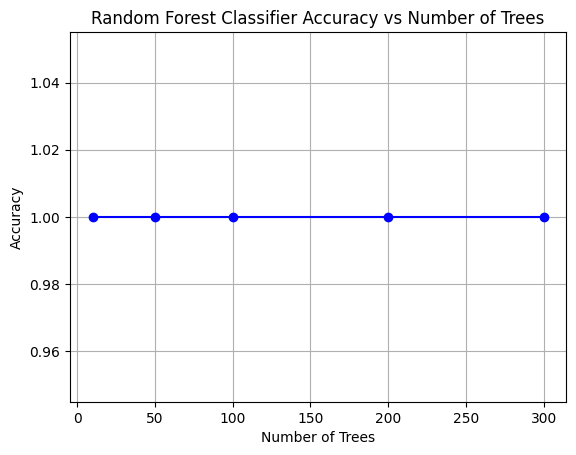

Number of Trees: 10, Accuracy: 1.0000
Number of Trees: 50, Accuracy: 1.0000
Number of Trees: 100, Accuracy: 1.0000
Number of Trees: 200, Accuracy: 1.0000
Number of Trees: 300, Accuracy: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of trees
n_estimators_values = [10, 50, 100, 200, 300]

# Store accuracy for each number of trees
accuracies = []

# Train Random Forest with different number of trees
for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs number of trees
plt.plot(n_estimators_values, accuracies, marker='o', color='b')
plt.title('Random Forest Classifier Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the accuracies
for n_estimators, accuracy in zip(n_estimators_values, accuracies):
    print(f"Number of Trees: {n_estimators}, Accuracy: {accuracy:.4f}")


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Binarize the target (necessary for multi-class AUC)
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the data into training and test sets
# Use y (the original target) for training the BaggingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use y_bin (binarized target) for calculating AUC
_, _, _, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)
# Make sure the split is consistent using the same random_state

# Initialize Logistic Regression as the base estimator
log_reg_base = LogisticRegression(max_iter=1000, random_state=42)

# Initialize the Bagging Classifier with Logistic Regression as the base estimator
# Use 'estimator' instead of 'base_estimator'
bagging_classifier = BaggingClassifier(estimator=log_reg_base, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train) # Use the original target (y_train)

# Predict probabilities for the test set
y_pred_prob = bagging_classifier.predict_proba(X_test)

# Compute AUC score (using the probabilities for each class and binarized y_test)
auc_score = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr', average='weighted')

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 1.0000


29. Train a Random Forest Regressor and analyze feature importance scores.


Feature: MedInc, Importance: 0.5260
Feature: HouseAge, Importance: 0.0547
Feature: AveRooms, Importance: 0.0472
Feature: AveBedrms, Importance: 0.0300
Feature: Population, Importance: 0.0317
Feature: AveOccup, Importance: 0.1382
Feature: Latitude, Importance: 0.0861
Feature: Longitude, Importance: 0.0861


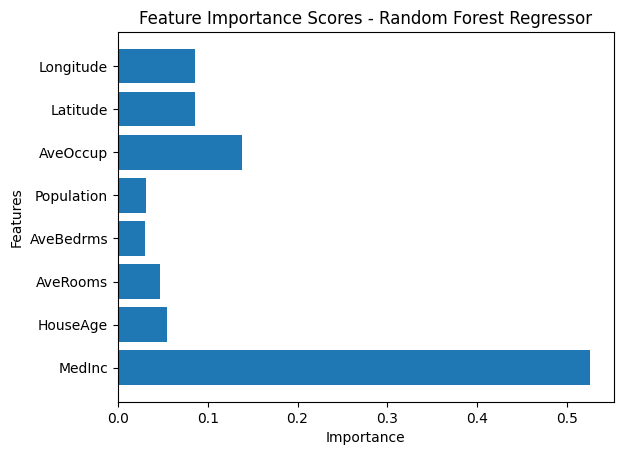

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)

# Get the feature importance scores
feature_importances = rf_regressor.feature_importances_

# Print the feature importance scores
for feature, importance in zip(california_housing.feature_names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Plot the feature importance scores
plt.barh(california_housing.feature_names, feature_importances)
plt.title('Feature Importance Scores - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Bagging Classifier with a base estimator (e.g., DecisionTreeClassifier)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42)

# Initialize a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Train the Random Forest Classifier
random_forest_classifier.fit(X_train, y_train)

# Predict using Bagging Classifier
y_pred_bagging = bagging_classifier.predict(X_test)

# Predict using Random Forest Classifier
y_pred_rf = random_forest_classifier.predict(X_test)

# Calculate accuracy for Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Calculate accuracy for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of both models
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")


Accuracy of Bagging Classifier: 1.0000
Accuracy of Random Forest Classifier: 1.0000


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy of the tuned Random Forest Classifier: {accuracy:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the tuned Random Forest Classifier: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
267 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

Estimators: 10, MSE: 0.2862
Estimators: 50, MSE: 0.2579
Estimators: 100, MSE: 0.2568
Estimators: 200, MSE: 0.2542


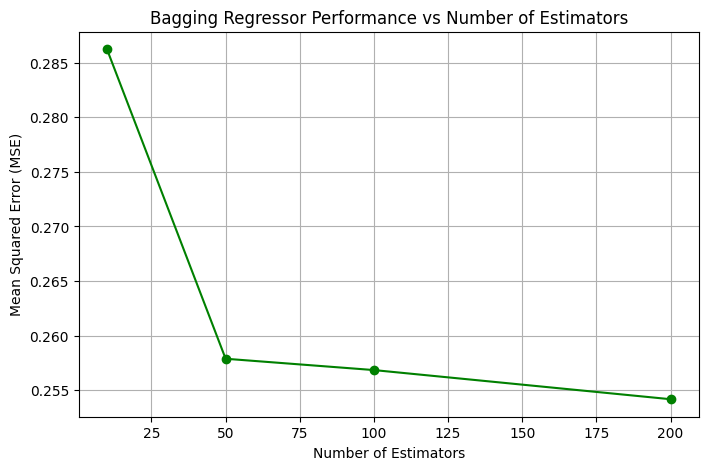

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of base estimators to test
n_estimators_list = [10, 50, 100, 200]

# Store MSE values
mse_scores = []

# Train Bagging Regressor with different numbers of base estimators
for n in n_estimators_list:
    # Indent the code block within the for loop
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(), # Changed 'base_estimator' to 'estimator'
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Estimators: {n}, MSE: {mse:.4f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', color='green')
plt.title('Bagging Regressor Performance vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

33. Train a Random Forest Classifier and analyze misclassified samples.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Identify misclassified samples
misclassified_indices = (y_test != y_pred)
X_misclassified = X_test[misclassified_indices]
y_true_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred[misclassified_indices]

# Convert to DataFrame for clarity
misclassified_df = pd.DataFrame(X_misclassified, columns=feature_names)
misclassified_df['True Label'] = [target_names[i] for i in y_true_misclassified]
misclassified_df['Predicted Label'] = [target_names[i] for i in y_pred_misclassified]

# Display misclassified samples
print("\nMisclassified Samples:\n")
print(misclassified_df)


Accuracy: 1.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Misclassified Samples:

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Bagging Classifier with Decision Tree as base estimator
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Changed 'base_estimator' to 'estimator'
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Print the comparison results
print(f"Accuracy of Single Decision Tree: {accuracy_dt:.4f}")
print(f"Accuracy of Bagging Classifier:  {accuracy_bagging:.4f}")


Accuracy of Single Decision Tree: 1.0000
Accuracy of Bagging Classifier:  1.0000



35. Train a Random Forest Classifier and visualize the confusion matrix




Accuracy: 1.0000


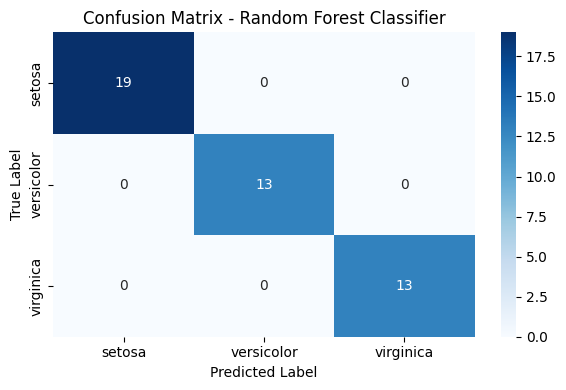

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learners
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # probability=True needed for stacking

# Final estimator
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', tree_clf),
        ('svm', svm_clf)
    ],
    final_estimator=log_reg,
    cv=5
)

# Train and evaluate base models
tree_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_stack = stacking_clf.predict(X_test)

# Accuracy scores
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_stack = accuracy_score(y_test, y_pred_stack)

# Print results
print(f"Accuracy - Decision Tree:     {acc_tree:.4f}")
print(f"Accuracy - SVM:               {acc_svm:.4f}")
print(f"Accuracy - Stacking Classifier: {acc_stack:.4f}")


Accuracy - Decision Tree:     1.0000
Accuracy - SVM:               1.0000
Accuracy - Stacking Classifier: 1.0000


37. Train a Random Forest Classifier and print the top 5 most important features.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top 5 important features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and Fl-score.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Bagging Classifier
# The 'base_estimator' argument has been replaced with 'estimator'
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Changed base_estimator to estimator
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_clf.predict(X_test)

# Evaluate performance
print("Classification Report (Precision, Recall, F1-score):\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report (Precision, Recall, F1-score):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

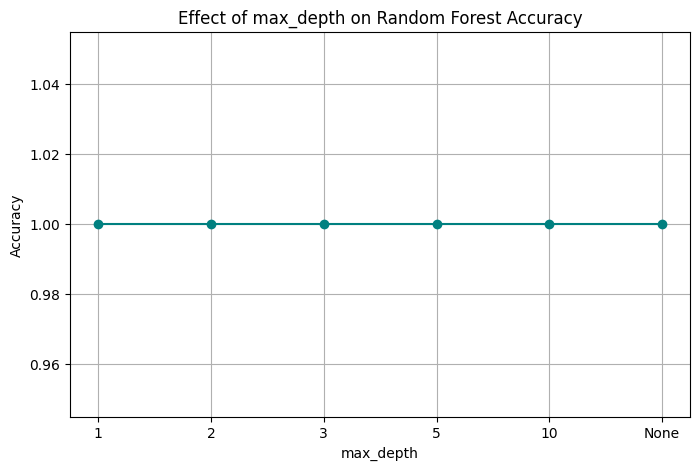

max_depth = 1, Accuracy = 1.0000
max_depth = 2, Accuracy = 1.0000
max_depth = 3, Accuracy = 1.0000
max_depth = 5, Accuracy = 1.0000
max_depth = 10, Accuracy = 1.0000
max_depth = None, Accuracy = 1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different max_depth values to test
max_depth_values = [1, 2, 3, 5, 10, None]  # None means unlimited depth
accuracies = []

# Train and evaluate Random Forest with different max_depth
for depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o', color='teal')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print accuracies
for depth, acc in zip(max_depth_values, accuracies):
    print(f"max_depth = {depth}, Accuracy = {acc:.4f}")


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with Decision Tree
# Replace 'base_estimator' with 'estimator'
bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # Changed to 'estimator'
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Bagging with K-Neighbors
# Replace 'base_estimator' with 'estimator'
bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),  # Changed to 'estimator'
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print comparison
print(f"Bagging Regressor with Decision Tree MSE: {mse_dt:.2f}")
print(f"Bagging Regressor with K-Neighbors MSE:   {mse_knn:.2f}")

Bagging Regressor with Decision Tree MSE: 2987.01
Bagging Regressor with K-Neighbors MSE:   3140.19


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.



ROC-AUC Score: 0.9968


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

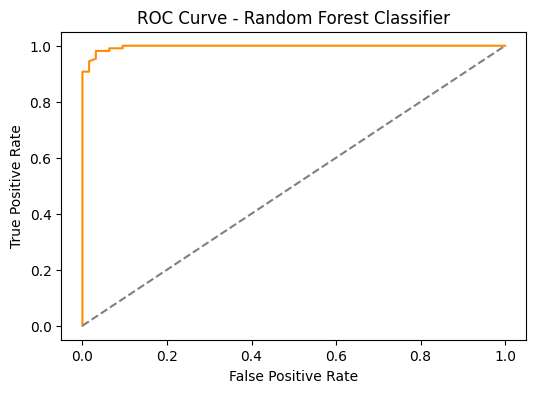

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability for class "1"

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt


42. Train a Bagging Classifier and evaluate its performance using cross-validation.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define Bagging Classifier with Decision Tree as the base estimator
# Use 'estimator' instead of 'base_estimator'
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,   # Number of base classifiers
    random_state=42
)

# Evaluate using cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667
Standard deviation of accuracy: 0.0211


43. Train a Random Forest Classifier and plot the Precision-Recall curve


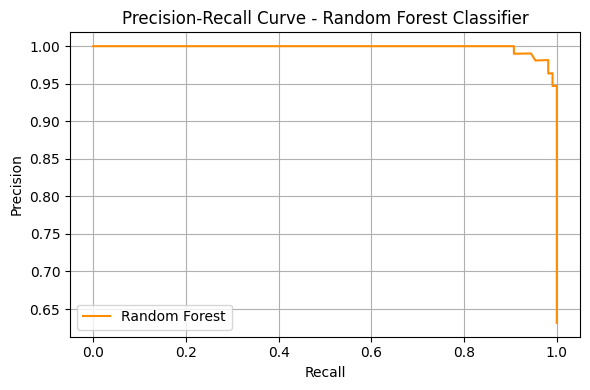

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for Precision-Recall curve
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability for class "1"

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=200, random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Stacking Classifier: {accuracy:.4f}")


Accuracy of Stacking Classifier: 1.0000


45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different levels of max_samples to test
max_samples_values = [0.5, 0.7, 0.9, 1.0]  # Proportion of samples used for each base model
mse_scores = []

# Train and evaluate Bagging Regressor with different max_samples
for max_samples in max_samples_values:
    # The 'base_estimator' argument has been replaced with 'estimator'
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),  # Use 'estimator' instead of 'base_estimator'
        n_estimators=50,
        max_samples=max_samples,
        random_state=42
    )
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print comparison
for max_samples, mse in zip(max_samples_values, mse_scores):
    print(f"max_samples = {max_samples}, MSE = {mse:.2f}")

max_samples = 0.5, MSE = 2826.94
max_samples = 0.7, MSE = 2797.22
max_samples = 0.9, MSE = 2897.93
max_samples = 1.0, MSE = 2987.01
